In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cftime

In [2]:
ds = xr.open_dataset('/home/ncs001/runpath/CEPM-p50-anthro-emissions.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:        (bound: 2, lat: 360, lon: 720, time: 98)
Coordinates:
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * lon            (lon) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * time           (time) object 2015-07-02 12:00:00 ... 2112-07-02 12:00:00
Dimensions without coordinates: bound
Data variables:
    CO2_em_anthro  (time, lat, lon) float64 ...
    lat_bnds       (lat, bound) float64 ...
    lon_bnds       (lon, bound) float64 ...
    time_bnds      (time, bound) object ...
Attributes:
    history:  Mon Apr 26 02:49:13 2021: ncks -O -d time,3,100 CEPM/p50emissio...
    NCO:      4.7.2

In [4]:
!ls /space/hall4/sitestore/eccc/crd/ccrn/users/rbw001/CMIP6_forcing/ScenarioMIP/Future_GHG_Emis/CO2-em-anthro*585*

/space/hall4/sitestore/eccc/crd/ccrn/users/rbw001/CMIP6_forcing/ScenarioMIP/Future_GHG_Emis/CO2-em-anthro_input4MIPs_emissions_ScenarioMIP_IAMC-REMIND-MAGPIE-ssp585-1-1_gn_201501-210012.nc


In [5]:
ds245=xr.open_dataset('/space/hall4/sitestore/eccc/crd/ccrn/users/rbw001/CMIP6_forcing/ScenarioMIP/Future_GHG_Emis/CO2-em-anthro_input4MIPs_emissions_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_gn_201501-210012.nc')

ds585=xr.open_dataset('/space/hall4/sitestore/eccc/crd/ccrn/users/rbw001/CMIP6_forcing/ScenarioMIP/Future_GHG_Emis/CO2-em-anthro_input4MIPs_emissions_ScenarioMIP_IAMC-REMIND-MAGPIE-ssp585-1-1_gn_201501-210012.nc')

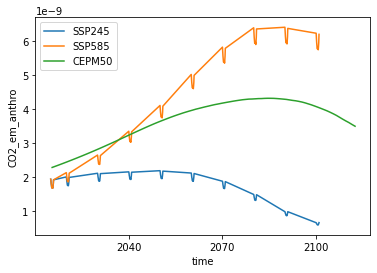

In [6]:
ds245.CO2_em_anthro.mean(dim=['lon','lat']).sum(dim='sector').plot(label='SSP245')
ds585.CO2_em_anthro.mean(dim=['lon','lat']).sum(dim='sector').plot(label='SSP585')
ds.CO2_em_anthro.mean(dim=['lon','lat']).plot(label='CEPM50')
plt.legend()
plt.savefig('cepm_vs_ssps.png', bbox_inches='tight')


In [8]:
!mv cepm_vs_ssps.png ~/public_html

In [7]:
!ls /space/hall4/sitestore/eccc/crd/ccrn/users/rbw001/CMIP6_forcing/NetCDF_processed/Future_GHG_Emis/StepOne/CO2

128_64_CO2_anthro_emissions_AIM-ssp370-lowNTCF.nc
128_64_CO2_anthro_emissions_AIM-ssp370.nc
128_64_CO2_anthro_emissions_GCAM4-ssp434.nc
128_64_CO2_anthro_emissions_GCAM4-ssp460.nc
128_64_CO2_anthro_emissions_IMAGE-ssp119.nc
128_64_CO2_anthro_emissions_IMAGE-ssp126.nc
128_64_CO2_anthro_emissions_MESSAGE-GLOBIOM-ssp245.nc
128_64_CO2_anthro_emissions_REMIND-MAGPIE-ssp534-over.nc
128_64_CO2_anthro_emissions_REMIND-MAGPIE-ssp585.nc
CO2_anthro_emissions_AIM-ssp370-lowNTCF.nc
CO2_anthro_emissions_AIM-ssp370.nc
CO2_anthro_emissions_GCAM4-ssp434.nc
CO2_anthro_emissions_GCAM4-ssp460.nc
CO2_anthro_emissions_IMAGE-ssp119.nc
CO2_anthro_emissions_IMAGE-ssp126.nc
CO2_anthro_emissions_MESSAGE-GLOBIOM-ssp245.nc
CO2_anthro_emissions_REMIND-MAGPIE-ssp534-over.nc
CO2_anthro_emissions_REMIND-MAGPIE-ssp585.nc


In [11]:
interp_path='/space/hall4/sitestore/eccc/crd/ccrn/users/rbw001/CMIP6_forcing/NetCDF_processed/Future_GHG_Emis/StepOne/CO2/{}'

In [20]:
ds126 = xr.open_dataset(interp_path.format('CO2_anthro_emissions_IMAGE-ssp126.nc'))
ds245 = xr.open_dataset(interp_path.format('CO2_anthro_emissions_MESSAGE-GLOBIOM-ssp245.nc'))
ds370 = xr.open_dataset(interp_path.format('CO2_anthro_emissions_AIM-ssp370.nc'))
ds585 = xr.open_dataset(interp_path.format('CO2_anthro_emissions_REMIND-MAGPIE-ssp585.nc'))

In [38]:
kgco2s_to_gtcyr = (3600*24*365)*12/44*5.1e14/1e12

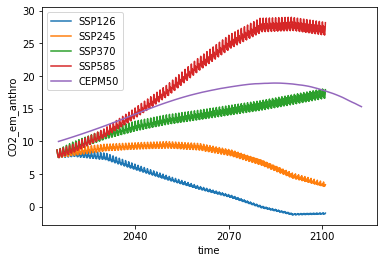

In [39]:
(ds126.CO2.mean(dim=['lon','lat'])*kgco2s_to_gtcyr).plot(label='SSP126')
(ds245.CO2.mean(dim=['lon','lat'])*kgco2s_to_gtcyr).plot(label='SSP245')
(ds370.CO2.mean(dim=['lon','lat'])*kgco2s_to_gtcyr).plot(label='SSP370')
(ds585.CO2.mean(dim=['lon','lat'])*kgco2s_to_gtcyr).plot(label='SSP585')
(ds.CO2_em_anthro.mean(dim=['lon','lat'])*kgco2s_to_gtcyr).plot(label='CEPM50')
plt.legend()
plt.savefig('cepm_vs_ssps.png', bbox_inches='tight')

In [34]:
ds126

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 1032)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) object 2015-01-16 00:00:00 ... 2100-12-16 00:00:00
Data variables:
    CO2      (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    title:    CMIP6 CO2 combined_source anthropogenic emissions for scenario ...
    note_1:   Generated by CMIP6_CO2_emis.f90 using script ~rbw001/Fortran/CM...
    note_2:   Gaps in the original time axis have been filled by linear inter...
    note_3:   Global attributes of original files are not reproduced here. Pl...
    note_4:   /space/hall4/sitestore/eccc/crd/ccrn/forcing/ESGFsources_for_fo...
    author:   Barbara Winter
    date:     14.05.2020  20:22:47

In [35]:
!ncdump -h /space/hall4/sitestore/eccc/crd/ccrn/forcing/ESGFsources_for_forcing/ScenarioMIP/Future_GHG_Emis/CO2-em-anthro_input4MIPs_emissions_ScenarioMIP_IAMC-IMAGE-ssp126-1-1_gn_201501-210012.nc

netcdf CO2-em-anthro_input4MIPs_emissions_ScenarioMIP_IAMC-IMAGE-ssp126-1-1_gn_201501-210012 {
dimensions:
	lon = 720 ;
	lat = 360 ;
	time = UNLIMITED ; // (120 currently)
	sector = 9 ;
	bound = 2 ;
variables:
	double lon(lon) ;
		lon:units = "degrees_east" ;
		lon:long_name = "longitude" ;
		lon:axis = "X" ;
		lon:bounds = "lon_bnds" ;
		lon:modulo = 360. ;
		lon:realtopology = "circular" ;
		lon:standard_name = "longitude" ;
		lon:topology = "circular" ;
	double lat(lat) ;
		lat:units = "degrees_north" ;
		lat:long_name = "latitude" ;
		lat:axis = "Y" ;
		lat:bounds = "lat_bnds" ;
		lat:realtopology = "linear" ;
		lat:standard_name = "latitude" ;
	double time(time) ;
		time:units = "days since 2015-01-01 0:0:0" ;
		time:long_name = "time" ;
		time:calendar = "365_day" ;
		time:axis = "T" ;
		time:bounds = "time_bnds" ;
		time:realtopology = "linear" ;
		time:standard_name = "time" ;
	double sector(sector) ;
		sector:long_name = "sector" ;
		sector:bounds = "sector_bnds" ;
		sector:id